## `K-Means++` from scratch!! 🚀 

In [1]:
import numpy as np
from typing import List

class KMeansPlusPlus:
    
    def __init__(self, n_clusters: int, max_iter: int = 100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def _initialize_centroids(self, X: np.ndarray) -> List[np.ndarray]:
        """Select initial cluster centroids using KMeans++ algorithm"""
        centroids = []
        # randomly select first centroid from data points
        rand_idx = np.random.choice(X.shape[0])
        centroids.append(X[rand_idx])
        
        # select remaining centroids using KMeans++ algorithm
        for _ in range(self.n_clusters - 1):
            dist_sq = np.array([min([np.linalg.norm(x-c)**2 for c in centroids]) for x in X])
            probs = dist_sq / dist_sq.sum()
            cumprobs = probs.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumprobs):
                if r < p:
                    i = j
                    break
            centroids.append(X[i])
        return centroids
    
    def _assign_clusters(self, X: np.ndarray, centroids: List[np.ndarray]) -> np.ndarray:
        """Assign each data point to the nearest cluster centroid"""
        clusters = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            distances = [np.linalg.norm(x - c) for c in centroids]
            cluster = np.argmin(distances)
            clusters[i] = cluster
        return clusters
    
    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> List[np.ndarray]:
        """Update cluster centroids based on the mean of data points assigned to each cluster"""
        centroids = []
        for i in range(self.n_clusters):
            centroid = X[clusters == i].mean(axis=0)
            centroids.append(centroid)
        return centroids
    
    def fit(self, X: np.ndarray) -> None:
        """Fit the KMeans++ model to the data"""
        centroids = self._initialize_centroids(X)
        for i in range(self.max_iter):
            clusters = self._assign_clusters(X, centroids)
            new_centroids = self._update_centroids(X, clusters)
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids
        self.centroids_ = centroids
        self.labels_ = self._assign_clusters(X, centroids)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict cluster labels for new data"""
        return self._assign_clusters(X, self.centroids_)


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


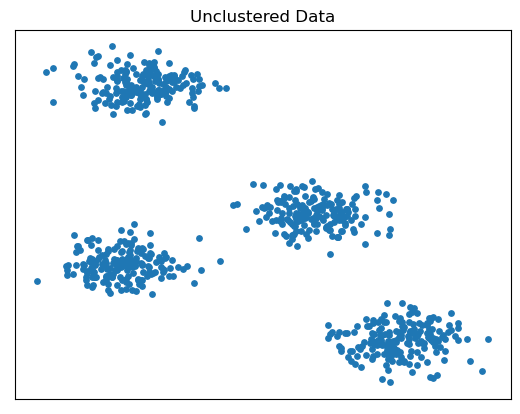

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Specifying the number of cluster our data should have
n_components = 4

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=0.4, random_state=0
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

## Smarter initialization of cluster centroids!! 

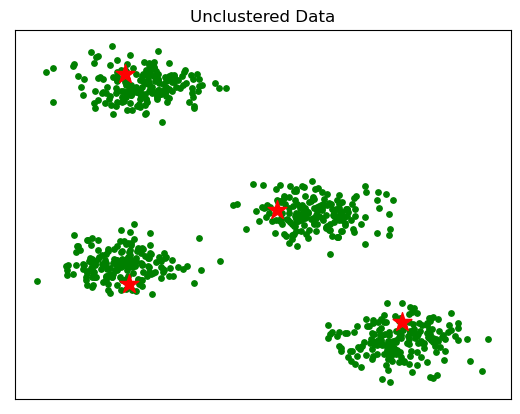

In [3]:
kmeans_pp = KMeansPlusPlus(n_clusters=4)


centroids = kmeans_pp._initialize_centroids(X)

centroids = np.array(centroids)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15, color='green')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='red')
plt.xticks([])
plt.yticks([])
plt.show()

## Perform K-Means++ clustering on the above data 🚀 

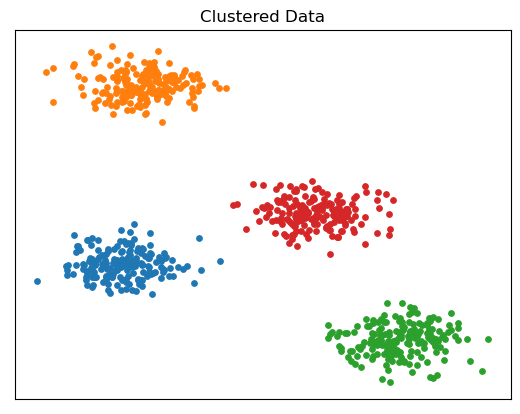

In [5]:
# Initialize KMeansPlusPlus
kmeans_pp = KMeansPlusPlus(n_clusters=4)

# fit the data & predict cluster labels
kmeans_pp.fit(X)
predicted_labels = kmeans_pp.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()